In [1]:
# Notebook for pictures

In [2]:
import cmocean.cm as cm
import copy
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
# color maps, including masking land as grey
cm_algae = copy.copy(cm.algae)
cm_algae.set_bad('grey')
cm_balance = copy.copy(cm.balance)
cm_balance.set_bad('grey')
cm_matter = copy.copy(cm.matter)
cm_matter.set_bad('grey')

# ratio to make plots square (size of gridY versus a gridX cell)
aspect = 500/440
adjustable = 'box'

In [4]:
# point to the ERDDAP server and the specific data sets we will use
server = "https://salishsea.eos.ubc.ca/erddap"
protocol = 'griddap'
dataset_ids = {"grid": "ubcSSn3DMeshMaskV21-08", 
               "bathymetry": "ubcSSnBathymetryV21-08", 
               "physics": "ubcSSg3DPhysicsFields1hV21-11",
               "biology" : "ubcSSg3DBiologyFields1hV21-11",
               "turbulence" : "ubcSSg3DwGridFields1hV21-11"}
datelist = ['2024-05-14T23:30:00']

In [5]:
# get bathymetry information
full_URL = '/'.join([server,protocol,dataset_ids['bathymetry']])
print(full_URL)
bathy = xr.open_dataset(full_URL)

https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSnBathymetryV21-08


In [7]:
# choose region of interest in model grid points
ygmin, ygmax = 700, 800
xgmin, xgmax = 110, 210

In [12]:
# my version of the glider file, you use yours.
mike = xr.open_dataset('../dfo-mike579-20240514_grid.nc')
mike

<xarray.Dataset> Size: 1MB
Dimensions:                (depth: 110, time: 62)
Coordinates:
  * depth                  (depth) float64 880B 0.5 10.5 ... 1.08e+03 1.09e+03
    profile                (time) float64 496B ...
  * time                   (time) datetime64[ns] 496B 2024-05-15T01:13:22.249...
Data variables: (12/23)
    longitude              (time) float64 496B ...
    latitude               (time) float64 496B ...
    profile_time_start     (time) datetime64[ns] 496B ...
    profile_time_end       (time) datetime64[ns] 496B ...
    heading                (depth, time) float64 55kB ...
    pitch                  (depth, time) float64 55kB ...
    ...                     ...
    salinity               (depth, time) float64 55kB ...
    potential_density      (depth, time) float64 55kB ...
    density                (depth, time) float64 55kB ...
    potential_temperature  (depth, time) float64 55kB ...
    profile_index          (depth, time) float64 55kB ...
    profile_direction      (depth, time) float64 55kB ...
Attributes: (12/64)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0
    acknowledgement:           Funding from Fisheries and Oceans Canada, Cana...
    cdm_data_type:             Trajectory
    comment:                   Calvert Island deployment
    contributor_name:          Hayley Dosser, Chris Payne, Stephanie Waterman
    ...                        ...
    summary:                   Transect from Calvert Island to beyond shelf b...
    time_coverage_end:         2024-05-15T17:04:30.000000000
    time_coverage_start:       2024-05-15T00:45:06.000000000
    title:                     dfo-mike579-20240515T0045
    transmission_system:       IRIDIUM
    wmo_id:                    4803927

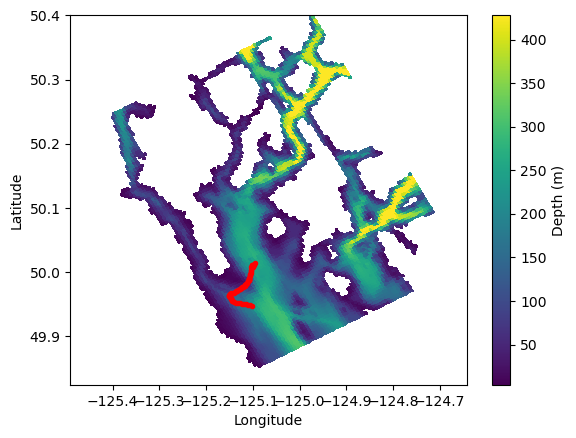

In [9]:
# latitude, longitude plot
fig, ax = plt.subplots(1, 1)
colours = ax.pcolormesh(bathy.longitude[ygmin:ygmax, xgmin:xgmax], bathy.latitude[ygmin:ygmax, xgmin:xgmax],
              bathy.bathymetry[ygmin:ygmax, xgmin:xgmax]);
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
cb = fig.colorbar(colours, ax=ax);
cb.set_label('Depth (m)');
ax.scatter(mike.longitude, mike.latitude, c='r', marker='.');

In [10]:
grid_loc = 'grid_from_lat_lon_mask999.nc'
jjii = xr.open_dataset(grid_loc)
method = 'nearest'
length = mike.latitude.shape[0]
jj = np.zeros(length).astype(int)
ii = np.zeros_like(jj)
for kk in range(length):
    jj[kk] = jjii.jj.sel(lats=mike.latitude[kk], lons=mike.longitude[kk], method=method).item()
    ii[kk] = jjii.ii.sel(lats=mike.latitude[kk], lons=mike.longitude[kk], method=method).item()
jjii.close()

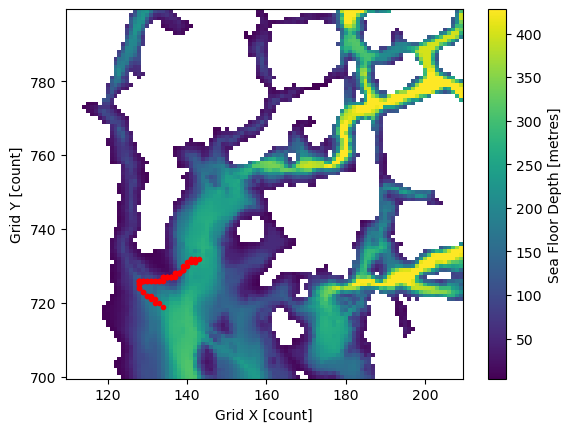

In [11]:
# plot bathymetry
bathy.bathymetry[ygmin:ygmax, xgmin:xgmax].plot();
plt.scatter(ii, jj, c='r', marker='.');